In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
data=pd.read_csv("all_month (1).csv")

In [141]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-07-16T14:13:08.670Z,40.366665,-123.920502,20.23,1.87,md,5.0,167.0,0.096860,0.00,...,2020-07-16T14:15:31.404Z,"22km SE of Rio Dell, CA",earthquake,2.36,0.60,0.060,4.0,automatic,nc,nc
1,2020-07-16T14:04:35.830Z,38.815666,-122.817833,2.34,1.37,md,28.0,50.0,0.009813,0.03,...,2020-07-16T14:12:05.510Z,"7km NW of The Geysers, CA",earthquake,0.19,0.38,0.130,5.0,automatic,nc,nc
2,2020-07-16T13:59:57.770Z,36.399333,-117.952000,-0.30,1.78,ml,18.0,106.0,0.111000,0.28,...,2020-07-16T14:04:10.703Z,"14km NNE of Olancha, CA",earthquake,0.66,31.61,0.184,25.0,automatic,ci,ci
3,2020-07-16T13:58:38.770Z,19.374332,-155.293839,7.54,1.72,md,12.0,255.0,NaN,0.15,...,2020-07-16T14:01:34.530Z,"9 km SW of Volcano, Hawaii",earthquake,1.68,1.03,0.770,7.0,automatic,hv,hv
4,2020-07-16T13:55:28.740Z,33.483667,-116.792500,6.24,0.41,ml,16.0,49.0,0.029370,0.17,...,2020-07-16T13:59:14.070Z,"8km NE of Aguanga, CA",earthquake,0.32,0.95,0.131,9.0,automatic,ci,ci


In [142]:
data.drop(['magType','nst','gap','rms','updated','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource'],axis=1,inplace=True)

In [143]:
data.head()

,time,latitude,longitude,depth,mag,dmin,net,id,place
0,2020-07-16T14:13:08.670Z,40.366665,-123.920502,20.23,1.87,0.096860,nc,nc73427091,"22km SE of Rio Dell, CA"
1,2020-07-16T14:04:35.830Z,38.815666,-122.817833,2.34,1.37,0.009813,nc,nc73427086,"7km NW of The Geysers, CA"
2,2020-07-16T13:59:57.770Z,36.399333,-117.952000,-0.30,1.78,0.111000,ci,ci38593058,"14km NNE of Olancha, CA"
3,2020-07-16T13:58:38.770Z,19.374332,-155.293839,7.54,1.72,NaN,hv,hv72046837,"9 km SW of Volcano, Hawaii"
4,2020-07-16T13:55:28.740Z,33.483667,-116.792500,6.24,0.41,0.029370,ci,ci38593042,"8km NE of Aguanga, CA"


In [144]:
data.drop(['net','id'],axis=1,inplace=True)

In [145]:
data.head()

,time,latitude,longitude,depth,mag,dmin,place
0,2020-07-16T14:13:08.670Z,40.366665,-123.920502,20.23,1.87,0.096860,"22km SE of Rio Dell, CA"
1,2020-07-16T14:04:35.830Z,38.815666,-122.817833,2.34,1.37,0.009813,"7km NW of The Geysers, CA"
2,2020-07-16T13:59:57.770Z,36.399333,-117.952000,-0.30,1.78,0.111000,"14km NNE of Olancha, CA"
3,2020-07-16T13:58:38.770Z,19.374332,-155.293839,7.54,1.72,NaN,"9 km SW of Volcano, Hawaii"
4,2020-07-16T13:55:28.740Z,33.483667,-116.792500,6.24,0.41,0.029370,"8km NE of Aguanga, CA"


In [146]:
data['mag'][0]

1.87

In [147]:
data['dmin'].replace(np.nan,data['dmin'].mean(),inplace=True)

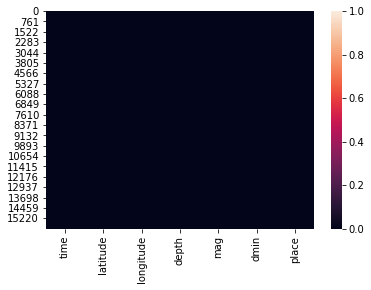

In [148]:
sns.heatmap(data.isnull())

In [155]:
c=[]
for i in range(len(data)):
    if data['mag'][i]<5:
        data['cdi'][i]=(0.4466+0.8809*data['mag'][i]-0.02945*((4+data['dmin'][i]**2)**0.5))
    else:
        data['cdi'][i]=float(0.4466+0.8809*data['mag'][i]-0.02945*((25+data['dmin'][i]**2)**0.5)+ 0.002100*data['mag'][i]*data['dmin'][i] )

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15975 entries, 0 to 15974
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       15975 non-null  object 
 1   latitude   15975 non-null  float64
 2   longitude  15975 non-null  float64
 3   depth      15975 non-null  float64
 4   mag        15970 non-null  float64
 5   dmin       15975 non-null  float64
 6   place      15975 non-null  object 
 7   cdi        15970 non-null  float64
dtypes: float64(6), object(2)
memory usage: 998.6+ KB


In [174]:
X=data[['mag','dmin']]
Y=data['cdi']

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
lm=LinearRegression()

In [179]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
predict=lm.predict(X_test)
predict

array([0.79403953, 1.00587675, 0.67913898, ..., 1.68388766, 2.49770083,
       1.43874144])

In [181]:
from sklearn.metrics import accuracy_score

In [183]:
accuracy_score(y_test.astype('int'),predict.astype('int'))

0.9933235969121635